## Experiments and Model Building

In [1]:
# In this section we continue to build and train the models, utilizing different feature selection techniques 
# combined with our resampling techniques. 
# In particular, we will have a look at Variancethreshold elimination, Selectkbest(chi2) with SMOTE and ADASYN. 

In [1]:
# Importing the libraries for model building and preprocessing
%matplotlib notebook
import dataframe_image as dfi
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
# Data Prep
data = pd.read_csv('data.csv')
data.columns = data.columns.str.lstrip()
data.rename({'Bankrupt?' : 'Bankruptcy'}, axis = 1, inplace=True)
X = data.drop('Bankruptcy', axis = 1)
y = data['Bankruptcy']

In [3]:
# To obtain the roc curves for low variance feature elimination and univariate feature elimination
# uncomment the features with low variance below and comment the other. The same way should be 
# chosen either adasyn and smote when building the curves. 
# The default is univariate feature elimination with smote as you can see.

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Remove features with low variance
#sel = VarianceThreshold(threshold=0.1)
#sel.fit(X_train)
#X_train = sel.transform(X_train)
#X_test = sel.transform(X_test)

# Remove features with Univariate feature elimination 
sel = SelectKBest(chi2, k=30)
sel.fit(X_train, y_train)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Standardize 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [4]:
# Resampling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_ad, y_train_ad = oversample.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


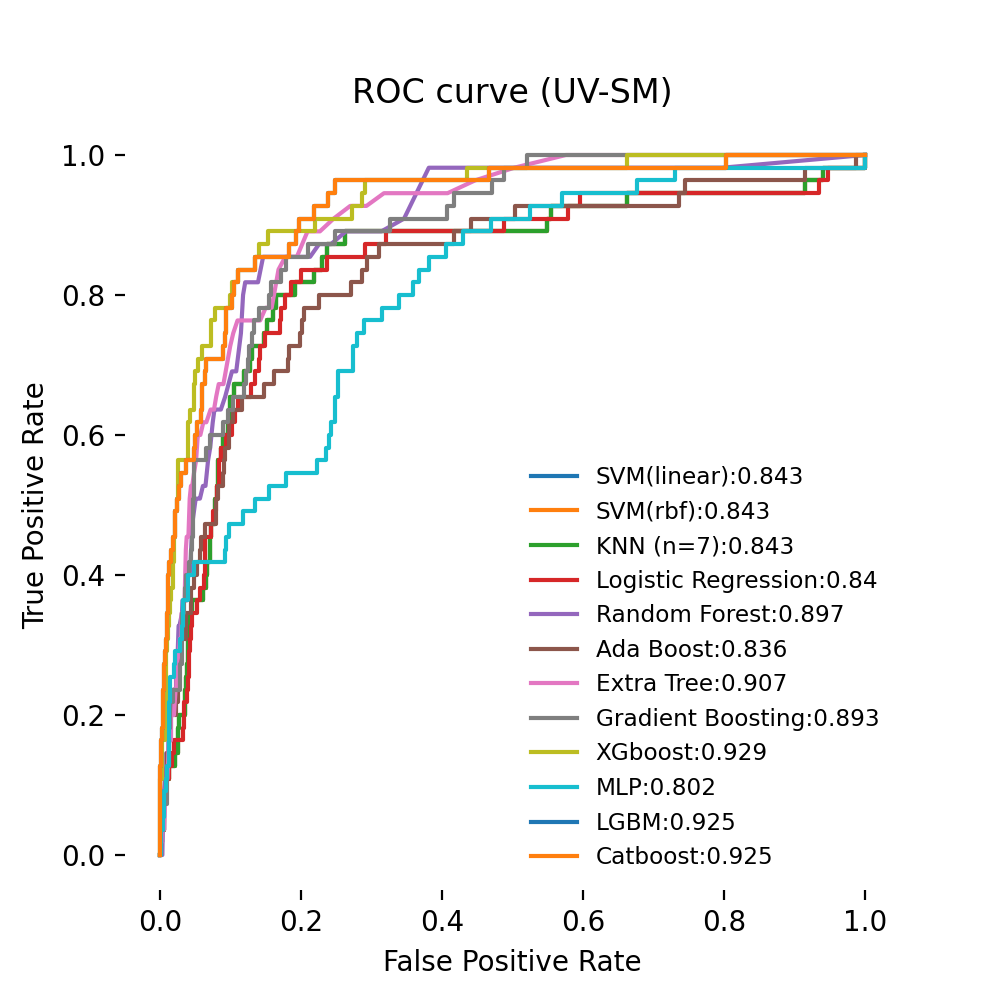

In [5]:
# Combining low variance elimination with random oversampling 
%matplotlib notebook
plt.figure(figsize=(5,5))

#SVM with linear kernel 
svm_clf = SVC(kernel='linear', probability=True).fit(X_train_sm, y_train_sm)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(linear):' + str(auc))

#SVM with rbf kernel
svmrbf_clf = SVC(kernel='rbf', probability=True).fit(X_train_sm, y_train_sm)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(rbf):' + str(auc))

#KNN algorithm with 7 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=7).fit(X_train_sm, y_train_sm)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'KNN (n=7):' + str(auc))

# Logistic regression
lg_clf = LogisticRegression().fit(X_train_sm, y_train_sm)
y_score = lg_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Logistic Regression:' + str(auc))

# Random forest 
rf_clf = RandomForestClassifier().fit(X_train_sm, y_train_sm)
y_score = rf_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Random Forest:' + str(auc))

# AdaBoost classifier 
adb_clf = AdaBoostClassifier().fit(X_train_sm, y_train_sm)
y_score = adb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Ada Boost:' + str(auc))

# Extra tree clasifier 
xtr_clf = ExtraTreesClassifier().fit(X_train_sm, y_train_sm)
y_score = xtr_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Extra Tree:' + str(auc))

# Gradient boosting 
gb_clf = GradientBoostingClassifier().fit(X_train_sm, y_train_sm)
y_score = gb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Gradient Boosting:' + str(auc))

# XGradient boosting 
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(X_train_sm, y_train_sm)
y_score = xgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'XGboost:' + str(auc))

# Multilayer perceptron(MLP)
mlp_clf = MLPClassifier(max_iter=1000).fit(X_train_sm, y_train_sm)
y_score = mlp_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'MLP:' + str(auc))

# LGBM
lgb_clf = LGBMClassifier().fit(X_train_sm, y_train_sm)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'LGBM:' + str(auc))

# Catboost 
cat_clf = CatBoostClassifier(silent=True).fit(X_train_sm, y_train_sm)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Catboost:' + str(auc))


plt.legend(frameon = False, fontsize='small')
plt.title('ROC curve (UV-SM)')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC curve (UV-SM)')
plt.show();

In [7]:
built_models = [svm_clf ,svmrbf_clf, knn_clf, lg_clf,
                    rf_clf, adb_clf, xtr_clf, gb_clf, 
                     xgb_clf, mlp_clf, lgb_clf, cat_clf]
models_names = ['svm_clf', 'svmrbf_clf', 'knn_clf', 'lg_clf',
                    'rf_clf', 'adb_clf', 'xtr_clf', 'gb_clf',
                     'xgb_clf', 'mlp_clf', 'lgb_clf', 'cat_clf']
scores = ['accuracy', 'recall', 'precision', 'f1 score', 'roc_auc']
df_scores = pd.DataFrame(np.zeros((len(models_names), len(scores))), columns=scores)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)

## Choice 3 SMOTE + Variance Threshold Elimination (0.1)

In [8]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('feature sel', VarianceThreshold(0.1)),
    ('scaler', MinMaxScaler()),
    ('selection', SMOTE()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [9]:
df_scores.sort_values('recall', ascending=False)

,accuracy,recall,precision,f1 score,roc_auc
lgb_clf,0.959086,0.472893,0.568182,0.407661,0.922008
cat_clf,0.960552,0.469100,0.540909,0.418490,0.920876
xgb_clf,0.961137,0.451529,0.509091,0.411297,0.920368
gb_clf,0.854084,0.182407,0.509091,0.111251,0.780917
adb_clf,0.834433,0.166652,0.513636,0.099505,0.763933
rf_clf,0.931515,0.161285,0.204545,0.134267,0.772799
xtr_clf,0.938995,0.160859,0.181818,0.145855,0.773191
mlp_clf,0.883853,0.159948,0.350000,0.104160,0.680302
knn_clf,0.832529,0.127607,0.381818,0.076757,0.661776
svmrbf_clf,0.779440,0.125492,0.486364,0.072099,0.695536


In [2]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-Varthreshold-SMOTE.png')

## Choice 4 ADASYN + Variance Threshold Elimination (0.1)

In [11]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('feature sel', VarianceThreshold(0.1)),
    ('scaler', MinMaxScaler()),
    ('selection', ADASYN()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [12]:
df_scores.sort_values('recall', ascending=False)

,accuracy,recall,precision,f1 score,roc_auc
xgb_clf,0.962457,0.457844,0.495455,0.433634,0.922660
cat_clf,0.959525,0.450019,0.522727,0.401148,0.918808
lgb_clf,0.957179,0.445697,0.531818,0.388118,0.924066
adb_clf,0.829740,0.168727,0.536364,0.100128,0.771163
gb_clf,0.849831,0.168174,0.468182,0.102696,0.779148
xtr_clf,0.937088,0.162762,0.190909,0.143125,0.771791
mlp_clf,0.883563,0.160223,0.345455,0.104624,0.659227
rf_clf,0.927701,0.159629,0.213636,0.128381,0.769836
svmrbf_clf,0.771812,0.125478,0.509091,0.071602,0.698116
knn_clf,0.821821,0.121338,0.381818,0.072209,0.672631


In [3]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-Varthreshold-ADAYSN.png')

## Choice 5 - SMOTE + Univariate feature selection 

In [14]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('feature sel', SelectKBest(chi2, k=30)),
    ('scaler', MinMaxScaler()),
    ('selection', SMOTE()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [15]:
df_scores.sort_values('recall', ascending=False)

,accuracy,recall,precision,f1 score,roc_auc
cat_clf,0.961725,0.473230,0.536364,0.427845,0.924363
xgb_clf,0.962603,0.467303,0.504545,0.437898,0.929338
lgb_clf,0.957912,0.443408,0.518182,0.388552,0.927387
rf_clf,0.951753,0.385229,0.468182,0.332282,0.903162
xtr_clf,0.955859,0.375255,0.418182,0.347699,0.908530
gb_clf,0.911130,0.334459,0.686364,0.221773,0.897624
mlp_clf,0.935769,0.320914,0.468182,0.245557,0.828435
adb_clf,0.888549,0.289247,0.695455,0.182949,0.878605
svmrbf_clf,0.884443,0.254483,0.604545,0.161608,0.856154
lg_clf,0.822848,0.226390,0.800000,0.131939,0.876704


In [4]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-UnivariateSel-SMOTE.png')

## Choice 6 ADASYN + Univariate feature Selection 

In [17]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('feature sel', SelectKBest(chi2, k=30)),
    ('scaler', MinMaxScaler()),
    ('selection', ADASYN()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [18]:
df_scores.sort_values('recall', ascending=False) 

,accuracy,recall,precision,f1 score,roc_auc
cat_clf,0.961726,0.472190,0.531818,0.426247,0.921085
lgb_clf,0.960111,0.469362,0.536364,0.422413,0.928612
xgb_clf,0.962460,0.468909,0.509091,0.438362,0.923430
xtr_clf,0.956885,0.384030,0.418182,0.362785,0.909617
rf_clf,0.949552,0.363509,0.450000,0.309818,0.900482
gb_clf,0.908783,0.327898,0.686364,0.216104,0.893775
mlp_clf,0.937088,0.314873,0.440909,0.246432,0.817956
adb_clf,0.885616,0.280341,0.690909,0.176098,0.857944
svmrbf_clf,0.878427,0.254953,0.640909,0.159663,0.851515
svm_clf,0.813756,0.218727,0.804545,0.126698,0.869618


In [5]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-UnivariateSel-ADASYN.png')